# This notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
csv_file = "Data-Collisions.csv"

In [3]:
df = pd.read_csv(csv_file)
df.head(20)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,NaN,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK M

In [4]:
df.shape

(194673, 38)

# Data Cleaning

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
df_clean = df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
                    'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
                    'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
                    'COLLISIONTYPE', 'INCDTTM', 'INCDTTM', 'JUNCTIONTYPE',
                    'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
                    'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING','ST_COLCODE', 'ST_COLDESC',
                    'SEGLANEKEY', 'CROSSWALKKEY',], axis=1)
df_clean.head(20)

,SEVERITYCODE,X,Y,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2,0,0,2,2013/03/27 00:00:00+00,N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,2,0,0,2,2006/12/20 00:00:00+00,0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,4,0,0,3,2004/11/18 00:00:00+00,0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,3,0,0,3,2013/03/29 00:00:00+00,N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,2,0,0,2,2004/01/28 00:00:00+00,0,Raining,Wet,Daylight,N
5,1,-122.387598,47.690575,Intersection,2,0,0,2,2019/04/20 00:00:00+00,N,Clear,Dry,Daylight,N
6,1,-122.338485,47.618534,Intersection,2,0,0,2,2008/12/09 00:00:00+00,0,Raining,Wet,Daylight,N
7,2,-122.320780,47.614076,Intersection,3,0,1,1,2020/04/15 00:00:00+00,N,Clear,Dry,Daylight,N
8,1,-122.335930,47.611904,Block,2,0,0,2,2006/06/15 00:00:00+00,0,Clear,Dry,Daylight,N
9,2,-122.384700,47.528475,Intersection,2,0,0,2,2006/03/20 00:00:00+00,0,Clear,Dry,Daylight,N


In [7]:
df_clean.dtypes

SEVERITYCODE      int64
X               float64
Y               float64
ADDRTYPE         object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
INCDATE          object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
HITPARKEDCAR     object
dtype: object

In [8]:
df_clean.shape

(194673, 14)

Check how many null values are in the dataframe

In [9]:
df_clean.isna().sum()

SEVERITYCODE       0
X               5334
Y               5334
ADDRTYPE        1926
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
INCDATE            0
UNDERINFL       4884
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
HITPARKEDCAR       0
dtype: int64

In [10]:
# Replace any empty string value to NaN
nan_value = float("NaN")
df_clean.replace(" ", nan_value,inplace=True)


df_clean.dropna(inplace=True)
df_clean.reset_index(drop=True, inplace=True)
print(df_clean.shape)
df_clean.isna().sum()

(184167, 14)


SEVERITYCODE    0
X               0
Y               0
ADDRTYPE        0
PERSONCOUNT     0
PEDCOUNT        0
PEDCYLCOUNT     0
VEHCOUNT        0
INCDATE         0
UNDERINFL       0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
HITPARKEDCAR    0
dtype: int64

# Change Data Types

In [11]:
df_clean.dtypes

SEVERITYCODE      int64
X               float64
Y               float64
ADDRTYPE         object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
INCDATE          object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
HITPARKEDCAR     object
dtype: object

In [12]:
df_clean['INCDATE'] = pd.to_datetime(df_clean['INCDATE'], format='%Y/%m/%d %H:%M:%S+%f').dt.date

In [13]:
df_clean.head(20)

,SEVERITYCODE,X,Y,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2,0,0,2,2013-03-27,N,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,2,0,0,2,2006-12-20,0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,4,0,0,3,2004-11-18,0,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,3,0,0,3,2013-03-29,N,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,2,0,0,2,2004-01-28,0,Raining,Wet,Daylight,N
5,1,-122.387598,47.690575,Intersection,2,0,0,2,2019-04-20,N,Clear,Dry,Daylight,N
6,1,-122.338485,47.618534,Intersection,2,0,0,2,2008-12-09,0,Raining,Wet,Daylight,N
7,2,-122.320780,47.614076,Intersection,3,0,1,1,2020-04-15,N,Clear,Dry,Daylight,N
8,1,-122.335930,47.611904,Block,2,0,0,2,2006-06-15,0,Clear,Dry,Daylight,N
9,2,-122.384700,47.528475,Intersection,2,0,0,2,2006-03-20,0,Clear,Dry,Daylight,N


In [14]:
df_clean.groupby('UNDERINFL')[['SEVERITYCODE']].count()

,SEVERITYCODE
UNDERINFL,
0,78064
1,3879
N,97244
Y,4980


In [15]:
df_clean.replace({'UNDERINFL' : {'Y': '1', 'N': '0'}}, inplace=True)
df_clean.groupby('UNDERINFL')[['SEVERITYCODE']].count()

,SEVERITYCODE
UNDERINFL,
0,175308
1,8859


In [16]:
df_clean['INCDATE'] = pd.to_datetime(df_clean['INCDATE'], format='%Y-%m-%d')
df_clean['UNDERINFL'] = df_clean['UNDERINFL'].astype('int64')
df_clean.dtypes

SEVERITYCODE             int64
X                      float64
Y                      float64
ADDRTYPE                object
PERSONCOUNT              int64
PEDCOUNT                 int64
PEDCYLCOUNT              int64
VEHCOUNT                 int64
INCDATE         datetime64[ns]
UNDERINFL                int64
WEATHER                 object
ROADCOND                object
LIGHTCOND               object
HITPARKEDCAR            object
dtype: object

In [17]:
df_clean.groupby('ADDRTYPE')[['SEVERITYCODE']].count()

,SEVERITYCODE
ADDRTYPE,
Block,121023
Intersection,63144


In [18]:
df_clean.groupby('WEATHER')[['SEVERITYCODE']].count()

,SEVERITYCODE
WEATHER,
Blowing Sand/Dirt,49
Clear,108833
Fog/Smog/Smoke,553
Other,765
Overcast,27105
Partly Cloudy,5
Raining,31987
Severe Crosswind,24
Sleet/Hail/Freezing Rain,112


In [19]:
df_clean.replace({'WEATHER': {'Other': 'Unknown','Sleet/Hail/Freezing Rain': 'Raining'}}, inplace=True)
df_clean['WEATHER'].replace(['Blowing Sand/Dirt', 'Severe Crosswind'], 'Windy', inplace=True)
df_clean['WEATHER'].replace(['Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy'], 'Cloudy', inplace=True)

In [20]:
df_clean.groupby('WEATHER')[['SEVERITYCODE']].count()

,SEVERITYCODE
WEATHER,
Clear,108833
Cloudy,27663
Raining,32099
Snowing,888
Unknown,14611
Windy,73


In [21]:
df_clean.groupby('ROADCOND')[['SEVERITYCODE']].count()

,SEVERITYCODE
ROADCOND,
Dry,121871
Ice,1174
Oil,53
Other,116
Sand/Mud/Dirt,63
Snow/Slush,984
Standing Water,102
Unknown,13795
Wet,46009


In [22]:
df_clean.replace({'ROADCOND': {'Other': 'Unknown','Standing Water': 'Wet',
                 'Sand/Mud/Dirt': 'Dirt','Snow/Slush': 'Ice'}}, inplace=True)
df_clean.groupby('ROADCOND')[['SEVERITYCODE']].count()

,SEVERITYCODE
ROADCOND,
Dirt,63
Dry,121871
Ice,2158
Oil,53
Unknown,13911
Wet,46111


In [23]:
df_clean.groupby('LIGHTCOND')[['SEVERITYCODE']].count()

,SEVERITYCODE
LIGHTCOND,
Dark - No Street Lights,1450
Dark - Street Lights Off,1145
Dark - Street Lights On,47250
Dark - Unknown Lighting,11
Dawn,2422
Daylight,113522
Dusk,5763
Other,188
Unknown,12416


In [24]:
df_clean['LIGHTCOND'].replace('Dark - No Street Lights', 'Dark - Street Lights Off', inplace=True)
df_clean['LIGHTCOND'].replace(['Dark - Unknown Lighting','Other'], 'Unknown', inplace=True)
df_clean.groupby('LIGHTCOND')[['SEVERITYCODE']].count()

,SEVERITYCODE
LIGHTCOND,
Dark - Street Lights Off,2595
Dark - Street Lights On,47250
Dawn,2422
Daylight,113522
Dusk,5763
Unknown,12615


In [25]:
df_clean.groupby('HITPARKEDCAR')[['SEVERITYCODE']].count()

,SEVERITYCODE
HITPARKEDCAR,
N,177537
Y,6630


In [26]:
df_clean.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2,0,0,2,2013-03-27,0,Cloudy,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,2,0,0,2,2006-12-20,0,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,4,0,0,3,2004-11-18,0,Cloudy,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,3,0,0,3,2013-03-29,0,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,2,0,0,2,2004-01-28,0,Raining,Wet,Daylight,N


In [27]:
df_clean.to_csv('df_clean.csv', index=False)

# Exploratory Data Analysis

In [28]:
#!conda install -c conda-forge folium=0.5.0 --yes
#print("folium installed!")

In [29]:
import folium

seattle_coordinates = [47.6062, -122.3321]

seattle_map = folium.Map(location=seattle_coordinates, zoom_start=12)
seattle_map

In [30]:
df_coords = df_clean.loc[0:599,'SEVERITYCODE':'Y']
df_coords.shape

(600, 3)

In [31]:
severity = folium.map.FeatureGroup()

for lat, lng, label in zip(df_coords.Y, df_coords.X, df_coords.SEVERITYCODE):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow' if label == 1 else 'red',
        popup = str(label),
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(seattle_map)

seattle_map

# Relationships with Severity and the Features

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## Relationship Between Severity and Address Type

In [62]:
df_clean.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR'],
      dtype='object')

In [40]:
df_addr_type = df_clean[['SEVERITYCODE', 'ADDRTYPE']]
df_addr_type.head()

,SEVERITYCODE,ADDRTYPE
0,2,Intersection
1,1,Block
2,1,Block
3,1,Block
4,2,Intersection


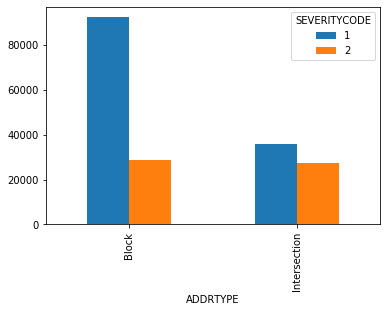

In [55]:
df_addr_type.groupby(['ADDRTYPE','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.show()

## Relationship Between Severity Code and Driving Under Influence

In [56]:
df_under_influence = df_clean[['SEVERITYCODE', 'UNDERINFL']]
df_under_influence.head()

,SEVERITYCODE,UNDERINFL
0,2,0
1,1,0
2,1,0
3,1,0
4,2,0


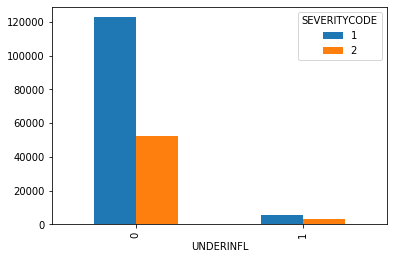

In [59]:
df_under_influence.groupby(['UNDERINFL','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.show()

## Relationship Between Severity Code and Weather

In [60]:
df_weather = df_clean[['SEVERITYCODE', 'WEATHER']]
df_weather.head()

,SEVERITYCODE,WEATHER
0,2,Cloudy
1,1,Raining
2,1,Cloudy
3,1,Clear
4,2,Raining


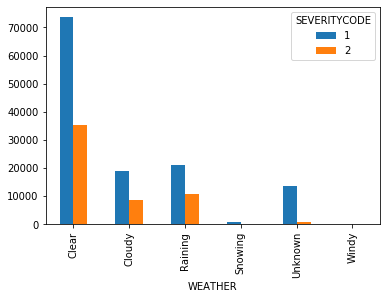

In [61]:
df_weather.groupby(['WEATHER','SEVERITYCODE']).size().unstack().plot(kind='bar')

## Relationship Between Severity Code and Road Condition

In [63]:
df_road = df_clean[['SEVERITYCODE','ROADCOND']]
df_road.head()

,SEVERITYCODE,ROADCOND
0,2,Wet
1,1,Wet
2,1,Dry
3,1,Dry
4,2,Wet


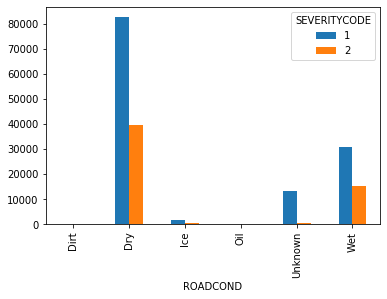

In [64]:
df_road.groupby(['ROADCOND','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.show()

## Relationship Between Severity Code and Light Condition

SEVERITYCODE                LIGHTCOND
0             2                 Daylight
1             1  Dark - Street Lights On
2             1                 Daylight
3             1                 Daylight
4             2                 Daylight


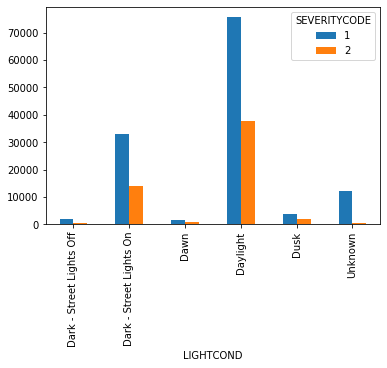

In [65]:
df_light = df_clean[['SEVERITYCODE','LIGHTCOND']]
print(df_light.head())
df_light.groupby(['LIGHTCOND','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.show()

## Relationship Between Severity and Hitting a Parked Car

SEVERITYCODE HITPARKEDCAR
0             2            N
1             1            N
2             1            N
3             1            N
4             2            N


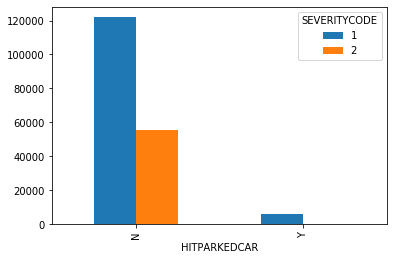

In [66]:
df_parked = df_clean[['SEVERITYCODE','HITPARKEDCAR']]
print(df_parked.head())
df_parked.groupby(['HITPARKEDCAR','SEVERITYCODE']).size().unstack().plot(kind='bar')
plt.show()

## Relationship Between Light Condition and Driving Under Influence

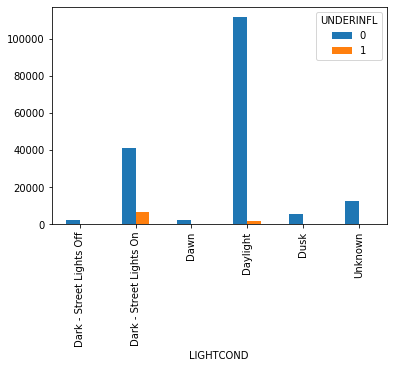

In [67]:
df_light_infl = df_clean[['LIGHTCOND','UNDERINFL']]
df_light_infl.groupby(['LIGHTCOND','UNDERINFL']).size().unstack().plot(kind='bar')